torch.Size([100, 1, 28, 28]) torch.Size([100])


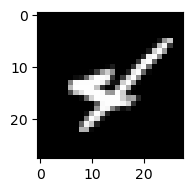

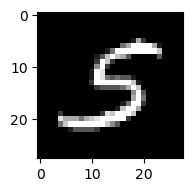

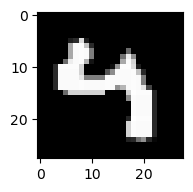

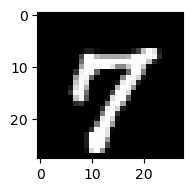

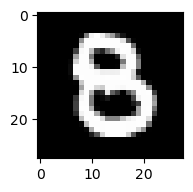

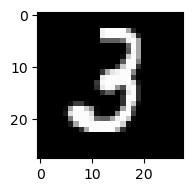

In [19]:
import torch 
import torch.nn as nn 
import torchvision 
import torchvision.transforms as transforms 
import matplotlib.pyplot as plt 
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyperparams
input_size = 28*28
hidden_size = 100 
num_classes = 10 
epochs = 2 
batch_sz  = 100
lr = 1e-3

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
#print(np.asarray(train_dataset).shape)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_sz, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_sz, shuffle=False)

examples = iter(train_loader)
#print(examples.shape)
samples, labels = examples.next()
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
    plt.show()


In [18]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)
criterion_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

n_total_steps = len(train_loader)

for curr_epoch in range(epochs):
    for i, (image, labels) in enumerate(train_loader):
        images = image.reshape(-1, 28**2).to(device)
        labels = labels.to(device)

        #forward
        output = model(images)
        loss = criterion_loss(output, labels)
        
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epochs: {curr_epoch} / {epochs}, step: {i+1}/{n_total_steps}, loss: {loss.item()}') 

# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0 
    for images,labels in test_loader:
        iimages = images.reshape(-1, 28**2).to(device)
        labels = labels.to(device)
        test_outputs = model(images)

        _, predictions = torch.max(test_outputs, 1) # value, index, so prediction = max_index
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy: {acc}')

epochs: 0 / 2, step: 100/600, loss: 0.4179439842700958
epochs: 0 / 2, step: 200/600, loss: 0.2839687764644623
epochs: 0 / 2, step: 300/600, loss: 0.2428956925868988
epochs: 0 / 2, step: 400/600, loss: 0.3034515380859375
epochs: 0 / 2, step: 500/600, loss: 0.1957540065050125
epochs: 0 / 2, step: 600/600, loss: 0.25605273246765137
epochs: 1 / 2, step: 100/600, loss: 0.22669991850852966
epochs: 1 / 2, step: 200/600, loss: 0.21833233535289764
epochs: 1 / 2, step: 300/600, loss: 0.1441839039325714
epochs: 1 / 2, step: 400/600, loss: 0.20882220566272736
epochs: 1 / 2, step: 500/600, loss: 0.1778932809829712


KeyboardInterrupt: 